<a href="https://colab.research.google.com/github/swapnil190301/EDA/blob/main/EXP8/DA_LAB_2019120037_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA ANALYTICS LAB EXPERIMENT 8: Support Vector Machine**

**Objective**: Understanding Support Vector Machine algorithm through building SVM algorithm in Python

**Introduction:** An SVM is a numeric classifier. That means that all of the features of the data must be numeric, not symbolic. 
Furthermore, in this class, we'll assume that the SVM is a binary classifier: that is, it classifies points as one of 
two classifications. We'll typically call the classifications "+" and " -".  
A trained SVM is defined by two values:  
• A normal vector w (also called the weight vector), which solely determines the shape and direction of the 
decision boundary.  
• A scalar offset b, which solely determines the position of the decision boundary with respect to the origin.  
A trained SVM can then classify a point x by computing w · x + b. If this value is positive, x is classified as +; 
otherwise, x is classified as -.  
The decision boundary is coerced by support vectors, so called because these vectors (data points) support the 
boundary: if any of these points are moved or eliminated, the decision boundary changes! All support vectors lie 
on a gutter, which can be thought of as a line running parallel to the decision boundary. There are two gutters: 
one gutter hosts positive support vectors, and the other, negative support vectors.  
Note that, though a support vector is always on a gutter, it's not necessarily true that every data point on a gutter 
is a support vector.  
Below are the five principle SVM equations, as taught in lecture and recitation. Equations 1-3 define the decision 
boundary and the margin width, while Equations 4 and 5 can be used to calculate the alpha (supportiveness) 
values for the training points.  

In [31]:
#importing all packages
import pandas as pd 
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix 
from sklearn.svm import SVC
 
%matplotlib inline 

In [32]:
# Function to plot SVC
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

In [33]:
#reading the dataset
data = pd.read_csv("/content/Social_Network_Ads.csv",index_col=[0])
data.head()

,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0


In [34]:
#attribute selection for support vector classifier model
X = data.loc[:,['Age','EstimatedSalary']]
y = data.iloc[:,-1]

In [35]:
#removing the mean of X and scaling it's variance to 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [36]:
#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

**Linear**

---






In [37]:
#linear svc
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [38]:
#print accuracy score
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
print('Accuracy of the model is %.2f%%' %(accuracy_score(y_test, y_pred)*100))

Accuracy of the model is 90.00%


Text(0, 0.5, 'X2')

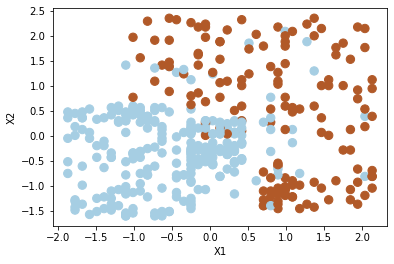

In [39]:
#scatter plot of dataset, so that data can be seen clearly
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

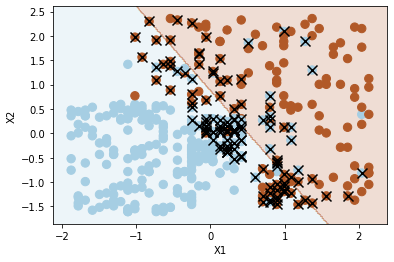

In [40]:
#plot linear svc
plot_svc(classifier,X,y)

**Non-Linear**

---

In [41]:
#non-linear svc
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [42]:
#print accuracy score
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
print('Accuracy of the model is %.2f%%' %(accuracy_score(y_test, y_pred)*100))

Accuracy of the model is 93.00%


Text(0, 0.5, 'X2')

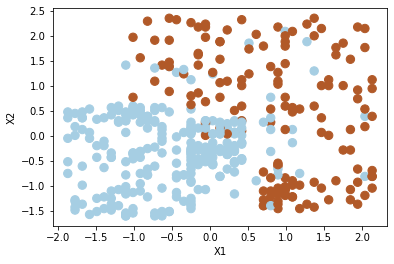

In [43]:
#scatter plot of dataset, so that data can be seen clearly
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

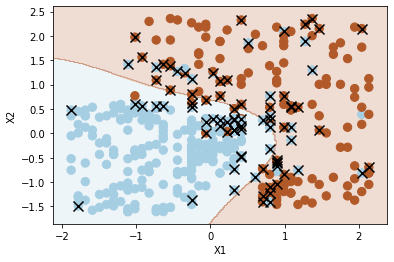

In [44]:
#plot non linear svc
plot_svc(classifier,X,y)

**ROC**

---

In [45]:
#importing all packages
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

In [46]:
# More constrained model
svm3 = SVC(C=1, kernel='rbf', gamma=1)
svm3.fit(X_train, y_train)

SVC(C=1, gamma=1)

In [47]:
# More flexible model
svm4 = SVC(C=1, kernel='rbf', gamma=50)
svm4.fit(X_train, y_train)

SVC(C=1, gamma=50)

In [48]:
#train-test split
y_train_score3 = svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)

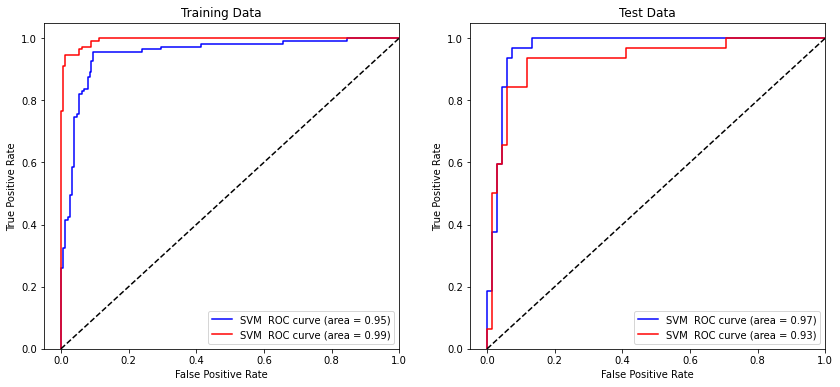

In [49]:
y_train_score3 = svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_train, y_train_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_train, y_train_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(false_pos_rate3, true_pos_rate3, label='SVM  ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax1.plot(false_pos_rate4, true_pos_rate4, label='SVM  ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax1.set_title('Training Data')

y_test_score3 = svm3.decision_function(X_test)
y_test_score4 = svm4.decision_function(X_test)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_test, y_test_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_test, y_test_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

ax2.plot(false_pos_rate3, true_pos_rate3, label='SVM  ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax2.plot(false_pos_rate4, true_pos_rate4, label='SVM  ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax2.set_title('Test Data')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")

**OBSERVATION:**



*   Linear SVC has 90% accuracy.
*Non-Linear SVC has 93% accuracy.
*   The third model has 95% accuracy in training set and 97% accuracy in test set.
*   The fourth model has 99% accuracy in training set and 93% accuracy in test set.

**INFERENCE:**


*   
Non-linear SVC is more efficient than linear SVC
*   The third model is more accurate than the fourth model according to the roc score for the test data.
*   I have learnt how svm works and now I know the difference between linear and non-linear svm.
*   I have learnt about ROC score and AUC score which are used to check accuracy of SVM models.